
#**Stratification**

In [ ]:
import numpy as np
import scipy.stats.qmc as qmc
import matplotlib.pyplot as plt
import math
from itertools import product

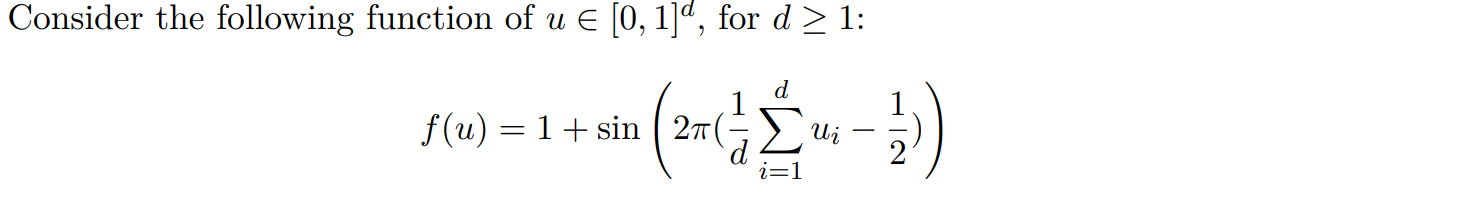

# Integral value

*Initialisation* : First, we compute by hand the integral in dimension 1.

$\int_{0}^{1} f(u) du  = \int_{0}^{1}  1 + sin(2\pi[(1/d)\sum_{i=1}^{d}(u_{i} - 1/2)]) du$ 

= $\int_{0}^{1} 1 + sin(2\pi[u - 1/2]) du$ because d = 1

= $1 + \int_{0}^{1} sin(2\pi u - \pi) du$ 

= $1 - \int_{0}^{1}  sin(2\pi u) du$

= $1$

We therefore expect to have 1 in dimension 1.

*Récurrence* : We know that the hypothesis is true for d = 1. Let's assume it's true for d, and show it is true for d+1.

The hypothesis for dimension d is that :
$\int_{u_{d} = 0}^{u_{d} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 1 + sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}(u_{i} - \frac{1}{2}))du_{1}.. du_{d} = 1 $ ie that $\int_{u_{d} = 0}^{u_{d} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}(u_{i} - \frac{1}{2}))du_{1}.. du_{d} = 0 $ 

For dimension d+1 : 

$\int_{u_{d+1} = 0}^{u_{d+1} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 1 + sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}(u_{i} - \frac{1}{2}))du_{1}.. du_{d+1}$

=  $1 - \int_{u_{d+1} = 0}^{u_{d+1} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}u_{i})du_{1}.. du_{d+1}$

= $1 - \int_{u_{d+1} = 0}^{u_{d+1} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}u_{i})du_{1}.. du_{d+1}$

Then we define $z= \sum_{i = 1}^{i = d + 1}u_{i}$ and we have $dz = du_{d+1}$


= $1 - \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} \int_{z = \sum_{i = 1}^{i = d}u_{i}}^{ z = 1 + \sum_{i = 1}^{i = d+1}u_{i}} sin(\frac{2 \pi}{d+1} z_{i}) dz du_{1}.. du_{d}$

= $1 + \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 
 cos(\frac{2\pi}{d} (1 + \sum_{i = 1}^{i = d}u_{i})) - cos(\frac{2\pi \sum_{i = 1}^{i = d}u_{i}}{d}) du_{1}.. du_{d}$

With cosinus identities it becomes :


 = $1 - \frac{dsin(\frac{2\pi}{d})}{2\pi}\int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 
 sin(\frac{2\pi}{d} (2 + \sum_{i = 1}^{i = d}u_{i})) du_{1}.. du_{d}$


 = $1 - \frac{dsin(\frac{2\pi}{d})}{2\pi}\int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 
 sin(\frac{2\pi}{d} (\sum_{i=1}^{i=d}(2u_{i} - \frac{1}{d}))du_{1}.. du_{d}$

Then, we define $z_{i} = \frac{1}{2} + 2u_{i} - \frac{1}{d}$ and the integral becomes

 = $1 - \frac{dsin(\frac{2\pi}{d})}{2\pi}\int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 
 sin(\frac{2\pi}{d} \sum_{i=1}^{i=d}z_{i} - \frac{1}{2})du_{1}.. du_{d}$

And we know from the hypothesis that 
$\int_{u_{d} = 0}^{u_{d} = 1} \int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} sin(\frac{2 \pi}{d} \sum_{i = 1}^{i = d}(u_{i} - \frac{1}{2}))du_{1}.. du_{d} = 0 $ 

so $\int_{u_{d} = 0}^{u_{d} = 1} ... \int_{u_{1} = 0}^{u_{1} = 1} 
 sin(\frac{2\pi}{d} \sum_{i=1}^{i=d}z_{i} - \frac{1}{2})du_{1}.. du_{d} = 0$

 So our expression equals 1 because the integral is equal to 0. 


*Conclusion* : By 'principe de récurrence', the integral value is 1
 

In [ ]:
integral_value = 1

In [ ]:
# Define the integrand function
def f(u):
  return 1 + np.sin( 2*np.pi*(np.mean(u) - 0.5) )

Let's look at the shape of the function f when the dimension is 1.

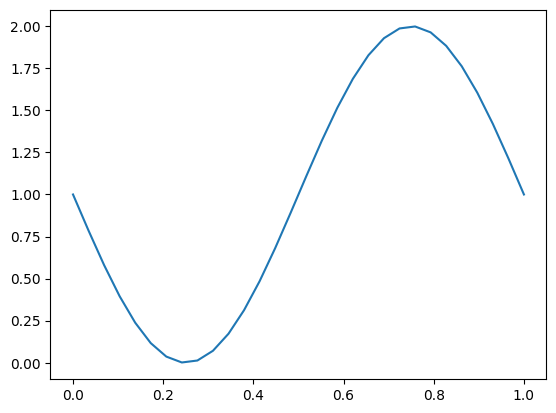

In [ ]:
x = np.linspace(0, 1, 30)
y = [f(i) for i in x]
plt.plot(x, y)

Let's look at the shape of the function f when the dimension is 2. 

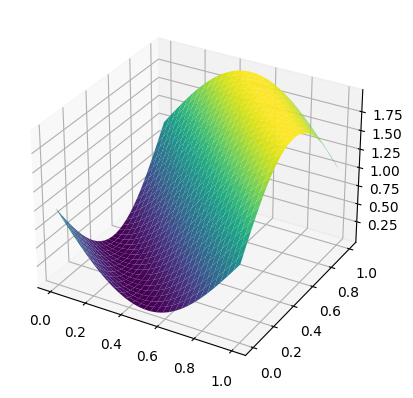

In [ ]:
def f_2(x, y):
    return 1 + np.sin( 2*np.pi*((x+y)/2 - 0.5) )

x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)
Z = f_2(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none');

##Question 1

1. Approximate the integral of f using standard Monte Carlo and quasi-Monte Carlo, and compare the results, for different values of d ( and different Monte Carlo sample sizes !).


##Plot Bias for different size of samples

In [ ]:
def MC_estimator(d, n):
    """
    Function that estimates the integral of a function f using Monte Carlo simulation.
    Inputs:
        - d: number of dimensions of the function domain
        - n: number of Monte Carlo samples to generate
    Outputs:
        - integral_MC: estimated integral of f using Monte Carlo simulation
    """
    points_MC = np.random.uniform(0, 1, (n, d))  # Generate n Monte Carlo samples in d dimensions, uniformly distributed between 0 and 1
    f_vectorized = np.vectorize(f, signature='(n)->()')  # Vectorize the function f so that it can operate on arrays
    f_MC = f_vectorized(points_MC)  # Evaluate the function f at the Monte Carlo samples
    integral_MC = np.mean(f_MC)  # Estimate the integral of f by taking the mean of the function evaluations
    return integral_MC  # Return the estimated integral of f using Monte Carlo simulation


In [ ]:
def QMC_Sobol_estimator(d, n):
    """
    Function that estimates the integral of a function f using Quasi-Monte Carlo simulation with Sobol' sequences.
    Inputs:
        - d: number of dimensions of the function domain
        - n: number of Quasi-Monte Carlo samples to generate
    Outputs:
        - integral_QMC: estimated integral of f using Quasi-Monte Carlo simulation with Sobol' sequences
    """
    sampler = qmc.Sobol(d)  # Initialize a Sobol' sequence sampler with d dimensions
    points_QMC = sampler.random(n)  # Generate n Quasi-Monte Carlo samples using the Sobol' sequence sampler
    
    f_vectorized = np.vectorize(f, signature='(n)->()')  # Vectorize the function f so that it can operate on arrays
    f_QMC = f_vectorized(points_QMC)  # Evaluate the function f at the Quasi-Monte Carlo samples
    
    integral_QMC = np.mean(f_QMC)  # Estimate the integral of f by taking the mean of the function evaluations
    return integral_QMC  # Return the estimated integral of f using Quasi-Monte Carlo simulation with Sobol' sequences


First let's compare the plot of pseudo random points and Quasi Monte Carlo points

In [ ]:
n = 25  # Set the number of samples to generate
d = 2  # Set the number of dimensions

points_PRNG = np.random.uniform(0, 1, (n, d))  # Generate n pseudo-random samples in d dimensions, uniformly distributed between 0 and 1
x_PRNG = points_PRNG[:, 0]  # Extract the x-coordinates of the pseudo-random samples
y_PRNG = points_PRNG[:, 1]  # Extract the y-coordinates of the pseudo-random samples

sampler = qmc.Sobol(d)  # Initialize a Sobol' sequence sampler with d dimensions
points_QMC = sampler.random(n)  # Generate n Quasi-Monte Carlo samples using the Sobol' sequence sampler
x_QMC = points_QMC[:, 0]  # Extract the x-coordinates of the Quasi-Monte Carlo samples
y_QMC = points_QMC[:, 1]  # Extract the y-coordinates of the Quasi-Monte Carlo samples


/usr/local/lib/python3.9/dist-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


0.007790204508287157

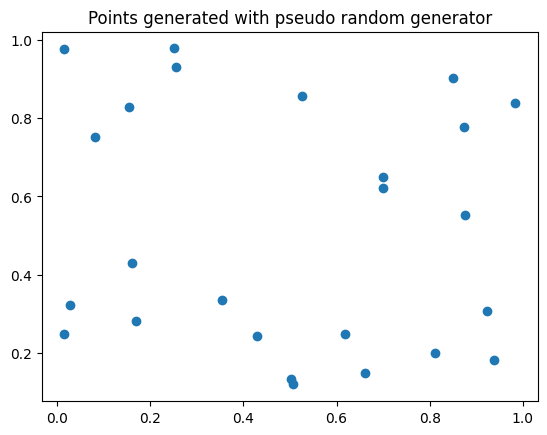

In [ ]:
plt.scatter(x_PRNG, y_PRNG)  # Create a scatter plot of the pseudo-random samples
plt.title('Points generated with pseudo random generator')  # Set the title of the plot
qmc.discrepancy(points_PRNG)  # Compute the discrepancy of the pseudo-random samples using the `discrepancy()` function from the `qmc` library

0.001679549237280309

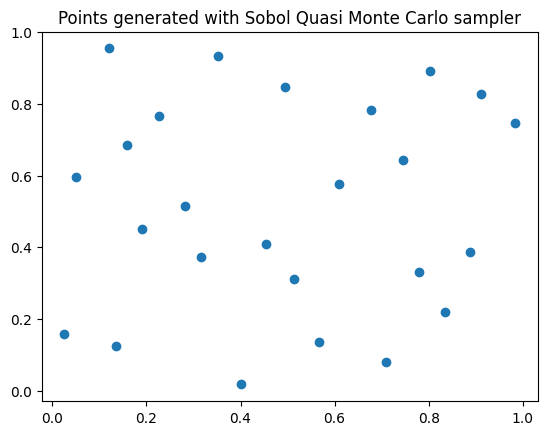

In [ ]:
plt.scatter(x_QMC, y_QMC)  # Create a scatter plot of the Quasi-Monte Carlo samples
plt.title('Points generated with Sobol Quasi Monte Carlo sampler')  # Set the title of the plot
qmc.discrepancy(points_QMC)  # Compute the discrepancy of the Quasi-Monte Carlo samples using the `discrepancy()` function from the `qmc` library

In [ ]:
def Comparaison_MC_QMC(d, N, nbr_points=200):
  """
  This function compares the performance of the Monte Carlo and Sobol Quasi Monte Carlo samplers
  for numerical integration of a given function in d dimensions over the unit hypercube [0, 1]^d.
  
  Args:
    d (int): The number of dimensions of the integration domain.
    N (int): The maximum sample size to use for the comparison.
    nbr_points (int): The number of sample sizes to use between 10 and N (inclusive).
  
  Returns:
    A list containing three elements: the list of sample sizes used, the list of Monte Carlo
    estimates for each sample size, and the list of Sobol Quasi Monte Carlo estimates for each
    sample size.
  """
  
  # Initialize lists to store the results for each iteration
  y_MC = []  # Initialize an empty list to store the Monte Carlo estimates
  y_QMC = []  # Initialize an empty list to store the Sobol Quasi Monte Carlo estimates
  
  # Define the range of iterations to use
  sample_size_list = np.linspace(10, N, nbr_points, dtype=int)  # Generate a list of nbr_points evenly spaced integers between 10 and N
  
  # Loop over the number of iterations
  for n in sample_size_list:
    # Compute the Monte Carlo estimate for the current sample size
    integral_MC_n = MC_estimator(d, n)
    
    # Compute the Sobol Quasi Monte Carlo estimate for the current sample size
    integral_QMC_n = QMC_Sobol_estimator(d, n)

    y_MC.append(integral_MC_n)  # Append the Monte Carlo estimate to the list y_MC
    y_QMC.append(integral_QMC_n)  # Append the Sobol Quasi Monte Carlo estimate to the list y_QMC
  
  # Return a list containing the sample size list, the Monte Carlo estimate list, and the Sobol Quasi Monte Carlo estimate list
  return [sample_size_list, y_MC, y_QMC]


In [ ]:
def plot_comparaison_MC_QMC(d_values, N, nbr_points=200):
    # Determine the number of rows and columns for the subplot grid
    cols = 3 
    rows = int(math.ceil(len(d_values)/3))
    
    # Create a figure and an array of subplots
    fig, ax = plt.subplots(rows, cols,
                           sharex='col', 
                           sharey='row', figsize=(12, 6))
  
    # Create lists of row and column indices for looping over subplots
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    
    # Loop over dimensions and plot the results
    for i in list_rows:
        for j in list_cols:
            k = i * cols + j
            if k < len(d_values):
                # Compute MC and QMC estimates for the given dimension and number of points
                res = Comparaison_MC_QMC(d_values[k], N, nbr_points=200)
                
                # Plot the MC and QMC estimates on the subplot
                ax[i,j].plot(res[0], res[1], label='MC with pseudo random number generator')
                ax[i,j].plot(res[0], res[2], label='QMC (Sobol)', color='red')
                
                # Set the subplot title and limits
                ax[i,j].set_title(f'd = {d_values[k]}')
                ax[i,j].set_ylim([0.5, 1.5])
                ax[i,j].grid()
                ax[i,j].set_xlabel('Number of evaluations')
                ax[i,j].set_ylabel('Integral value')

    # Get the handles and labels of the legend for the first subplot
    lines_labels = [ax[0,0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

    # Create a legend for the entire figure
    fig.legend(lines, labels, loc='lower center', ncol=4)
    
    # Add a title to the figure
    fig.suptitle('Comparison between classical MC and QMC(Sobol) for different dimensions', fontsize=16)



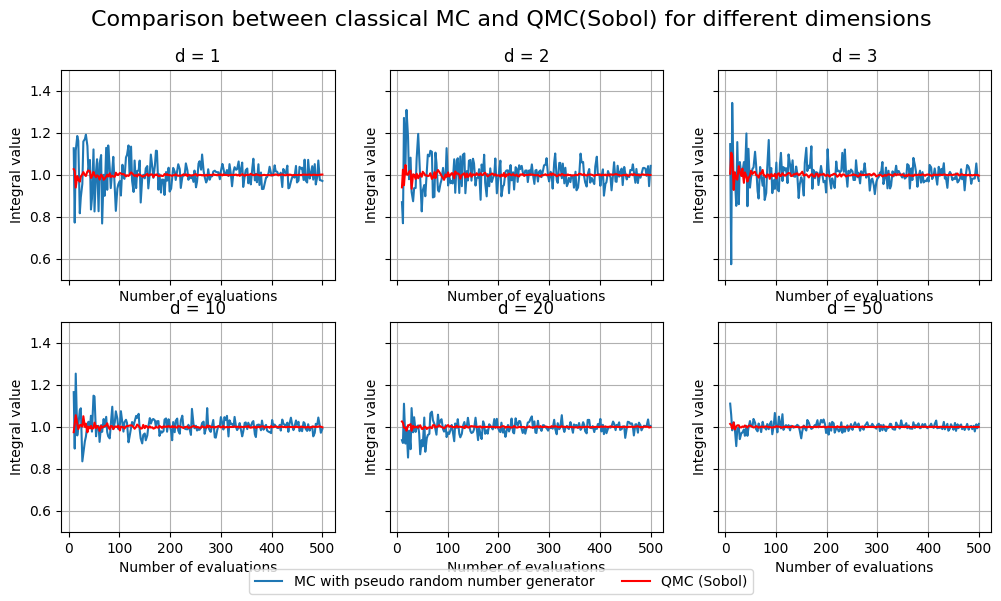

In [ ]:
plot_comparaison_MC_QMC([1,2,3,10,20,50], 500, nbr_points=200)

#Plot the RMSE


In [ ]:
def Comparaison_RMSE_MC_QMC_mean(d, N, nbr_points=200, sim_per_sample_size=10, ax=None):
    # Initialize arrays for storing results
    y_MC = np.zeros((nbr_points, sim_per_sample_size))  # Array for MC estimator values
    y_QMC = np.zeros((nbr_points, sim_per_sample_size))  # Array for QMC (Sobol) estimator values

    # Loop over multiple runs to compute estimators for different sample sizes
    for j in range(sim_per_sample_size): 
        y_MC_j = []  # Array for storing MC estimator values for this run
        y_QMC_j = []  # Array for storing QMC (Sobol) estimator values for this run
        sample_size_list = np.linspace(10,N,nbr_points, dtype = int)  # Generate a list of sample sizes to use for this run
        for n in sample_size_list:

            # Compute MC and QMC (Sobol) estimators for this sample size
            integral_MC_n_j = MC_estimator(d,n)
            integral_QMC_n_j = QMC_Sobol_estimator(d,n)

            # Add the estimators to the arrays for this run
            y_MC_j.append(integral_MC_n_j)
            y_QMC_j.append(integral_QMC_n_j)

        # Add the arrays for this run to the overall arrays
        y_MC[:, j] = y_MC_j
        y_QMC[:, j] = y_QMC_j

    # Compute the mean and variance of the estimators over multiple runs
    bias_MC = np.mean( y_MC, axis = 1) - integral_value  # Compute the bias of the MC estimator
    RMSE_MC = np.sqrt( np.var(y_MC, axis = 1) + bias_MC**2)  # Compute the RMSE of the MC estimator

    bias_QMC = np.mean( y_QMC, axis = 1) - integral_value  # Compute the bias of the QMC (Sobol) estimator
    RMSE_QMC = np.sqrt( np.var(y_QMC, axis = 1) + bias_QMC**2)  # Compute the RMSE of the QMC (Sobol) estimator

    # Rescale of the theoretical convergence rate by a constant 
    ref_convergence = 1/np.sqrt(sample_size_list)  # Theoretical convergence rate for MC estimator
    rescale = (RMSE_MC[0]+RMSE_MC[1])/(ref_convergence[0]+ref_convergence[1])  # Compute rescale factor
    ref_convergence *= rescale  # Rescale the convergence rate by the factor

    ref_convergence_QMC = 1/sample_size_list  # Theoretical convergence rate for QMC (Sobol) estimator
    rescale = (RMSE_QMC[0] + RMSE_QMC[0])/(ref_convergence_QMC[0]+ref_convergence_QMC[1])  # Compute rescale factor
    ref_convergence_QMC *= rescale  # Rescale the convergence rate by the factor

    # Return sample size list, RMSE values for MC estimator and QMC estimator, and rescaled theoretical convergence rates
    return([sample_size_list, RMSE_MC, RMSE_QMC, ref_convergence, ref_convergence_QMC])


In [ ]:
def plot_comparaison_RMSE_MC_QMC_mean(d_values, N, nbr_points=200, sim_per_sample_size=10, ax=None):
    # Compute the number of rows and columns needed for the subplots
    cols = 3 
    rows = int(math.ceil(len(d_values)/3))
    # Create a new figure with the specified number of rows and columns
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    # Create a list of rows and columns to iterate over the subplots
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    
    # Iterate over the subplots and plot the data for each dimension in d_values
    for i in list_rows :
      for j in list_cols :
        # Compute the index of the current dimension in d_values
        k = i*cols + j
        # Check if we have finished plotting all the dimensions in d_values
        if k <= len(d_values) :
          # Compute the RMSE for the current dimension using the Comparaison_RMSE_MC_QMC_mean function
          res = Comparaison_RMSE_MC_QMC_mean(d = d_values[k], N = 500, sim_per_sample_size = 10)
          # Plot the RMSE values for MC and QMC, as well as the theoretical convergence rates
          ax[i,j].plot(res[0], res[1], label='MC with pseudo random number generator')
          ax[i,j].plot(res[0], res[2], label='QMC (Sobol)', color = 'red')
          ax[i,j].plot(res[0], res[3], label = 'Theoretical MC convergence rate', color ='darkblue', linestyle='--')
          ax[i,j].plot(res[0], res[4], label = '1/n', color = 'darkred', linestyle='--')
          # Set the title of the subplot to the current dimension
          ax[i,j].set_title(f'd = {d_values[k]}')
          # Set the y-axis limits to [0, 0.25]
          ax[i,j].set_ylim([0,0.25])
          # Add gridlines to the subplot
          ax[i,j].grid()
          # Set the x-axis label to 'Size of samples'
          ax[i,j].set_xlabel('Size of samples')
          # Set the y-axis label to 'RMSE'
          ax[i,j].set_ylabel('RMSE')
    # Combine the legend handles and labels from all subplots
    lines_labels = [ax[0,0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    # Add a figure legend using the combined legend handles and labels
    fig.legend(lines, labels, loc='lower center', ncol=4)
    # Add a main title to the figure
    fig.suptitle('Comparison between classical MC and QMC (Sobol) for different dimensions', fontsize=16)


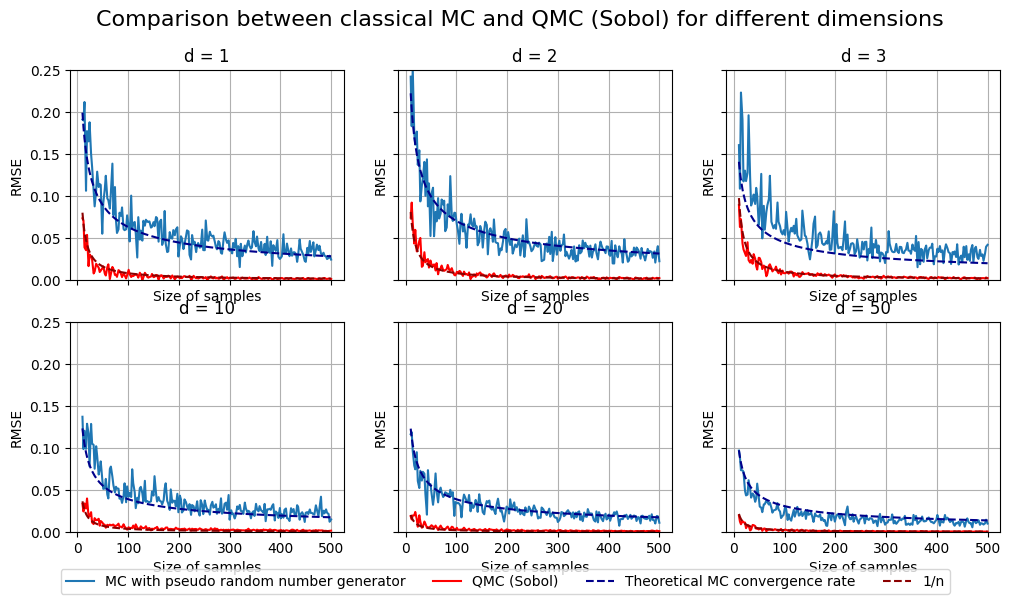

In [ ]:
plot_comparaison_RMSE_MC_QMC_mean([1,2,3,10,20,50], 500, sim_per_sample_size = 300) 
#-Peut être affiner les lignes avec linewidth = 0.5 (à voir)

#Question 2



First to compute Haber estimator we compute every coordinates of the center of the latin hypercubes. To do that we generate a 1D array that stores all the possibles values of the center of coordinates, for k = 2 these are 0,25 and 0,75 for example.

Then we generate all the possibles combinations of these coordinates in an array of size d which gives us exactly all the coordinates of the center of the latin hypercubes.

In [ ]:
def generate_combinations(coords,d):
    """
    Generates all possible combinations of the elements in lst with replacement.
    
    Args:
    - lst (list): a list of n unique elements
    
    Returns:
    - A list of tuples, where each tuple is a possible combination of the elements in lst with replacement
    """
    return np.stack(list(product(coords, repeat = d)))

def generate_1D(k):
    """
    Generates a list of k 1D coordinates for the center of a Latin hypercube.
    
    Args:
    - k (int): the number of coordinates to generate
    
    Returns:
    - A list of k 1D coordinates for the center of a Latin hypercube: 
    every possible k coordinates of the center of the Latin hypercube
    """
    # Generate the 1D list of possible coordinates for the center of the latin hypercubes
    return [(2*i+1)/(2*k) for i in range(k)]


def generate_center(k, d):
    """
    Generates the center of a d-dimensional Latin hypercube with k points.
    
    Args:
    - k (int): the number of points in the hypercube
    - d (int): the dimension of the hypercube
    
    Returns:
    - A numpy array of shape (k**d, d), where each row is a combination of the 1D coordinates for the center of the hypercube
      By generating all of the combination possible we get all the center possible.
    """
    # Generate the 1D coordinates for the center of the hypercube
    coords = generate_1D(k)
    
    # Generate all possible combinations of the 1D coordinates to get the center of the hypercube
    center = generate_combinations(coords, d)
    
    return center


Plot of the stratification for d = 2.

Text(0.5, 1.0, 'Center of Latin hypercube for k = 5')

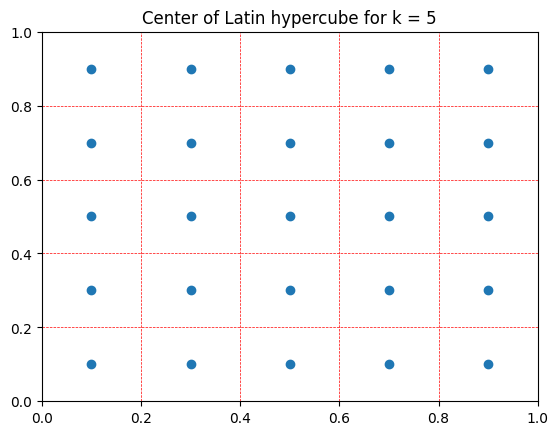

In [ ]:
# Define the parameters for the Latin hypercube
k = 5  # Number of intervals for each dimension
d = 2  # Number of dimensions

# Generate the center of the Latin hypercube
center = generate_center(k, d)

# Extract the coordinates for each dimension
x = center[:, 0]  # x-coordinates
y = center[:, 1]  # y-coordinates

# Create a scatter plot of the Latin hypercube center
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.scatter(x, y)

# Set the x-axis and y-axis limits to 0 and 1.1
plt.xlim([0, 1])
plt.ylim([0, 1])

# Add a title to the plot
plt.title('Center of Latin hypercube for k = 5')


Plot of the Quasi Monte Carlo sampler in dimension 2.

0.0021225449342401337

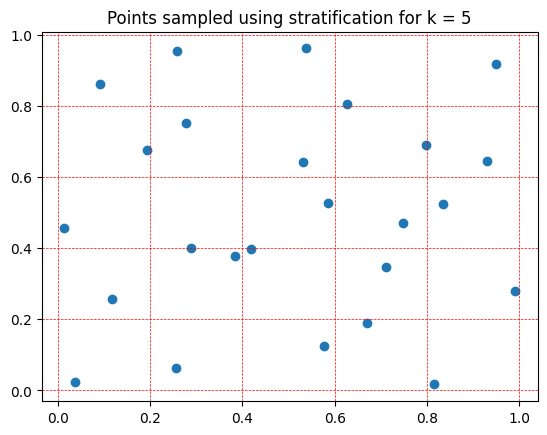

In [ ]:
# Generate a uniform random vector within a range centered around each element of the center of the Latin hypercube
uniform_vect = np.random.uniform(-1/(2*k),1/(2*k),(k**d,d))

# Add the random vector to the center of the Latin hypercube to get a set of points sampled using stratification
points = center + uniform_vect

# Extract the x and y coordinates of the points
x = points[:, 0]
y = points[:, 1]

# Plot the points using matplotlib and add a grid and a title to the plot
plt.grid(color = 'red', linestyle = '--', linewidth = 0.5)
plt.title('Points sampled using stratification for k = 5')
plt.scatter(x,y)

# Calculate the discrepancy of the set of points using the qmcpy package
qmc.discrepancy(points)


## 2.1) 1st Haber estimator

In [ ]:
def Haber_estimator_1(k,d,l = 1):
    # Generate center of latin hypercube
    center = generate_center(k,d)
    # Generate uniform vector for each coordinate in the center
    uniform_vect = np.random.uniform(-1/(2*k),1/(2*k),(k**d,d))
    # Add the uniform vector to the center to get new points for sampling
    center_uniform = center + uniform_vect
    # Vectorize the function f to apply it to the center_uniform array
    f_vectorized = np.vectorize(f, signature = '(n)->()')
    # Apply the function f to the new points to obtain an array of function values
    f_center_uniform = f_vectorized(center_uniform)
    # Return the mean of the function values as the estimator
    return np.mean(f_center_uniform)

In [ ]:
def Comparaison_QMC_Haber_1(k, d, sim_per_sample_size=10):
    # Define the number of points in the sample
    N = k**d
    nbr_points = k 

    # Initialize arrays to store the estimator values for each sample size and simulation
    y_Haber = np.zeros((nbr_points, sim_per_sample_size))
    y_QMC = np.zeros((nbr_points, sim_per_sample_size))

    # Generate a list of sample sizes
    sample_size_list = np.array([ i**d for i in range(1,k+1)])

    # Perform multiple simulations
    for j in range(sim_per_sample_size): 
        # Initialize arrays to store the estimator values for each sample size in the current simulation
        y_Haber_j = []
        y_QMC_j = []

        # Compute the estimator for each sample size
        for i,n in enumerate(sample_size_list):
            # Compute the QMC estimator using the Sobol sequence
            integral_QMC_n_j = QMC_Sobol_estimator(d,n)
            y_QMC_j.append(integral_QMC_n_j)

            # Compute the Haber estimator using Latin hypercube sampling
            y_Haber_j.append(Haber_estimator_1(k = i+1, d = d))

        # Store the estimator values for the current simulation
        y_QMC[:, j] = y_QMC_j
        y_Haber[:,j] = y_Haber_j

    # Compute the bias and RMSE for each estimator over multiple runs
    bias_Haber = np.mean( y_Haber, axis = 1) - integral_value
    RMSE_Haber = np.sqrt( np.var(y_Haber, axis = 1) + bias_Haber**2)

    bias_QMC = np.mean( y_QMC, axis = 1) - integral_value
    RMSE_QMC = np.sqrt( np.var(y_QMC, axis = 1) + bias_QMC**2)

    # Compute the theoretical convergence rates
    ref_convergence_QMC = 1/sample_size_list
    rescale = (RMSE_QMC[0]+RMSE_QMC[1])/(ref_convergence_QMC[0] + ref_convergence_QMC[1])
    ref_convergence_QMC *= rescale

    ref_convergence_Haber = 1/(sample_size_list)**(1/2 +1/d)
    rescale = (RMSE_Haber[0] + RMSE_Haber[1])/(ref_convergence_Haber[0] + ref_convergence_Haber[1])
    ref_convergence_Haber *= rescale

    return([sample_size_list, RMSE_Haber, RMSE_QMC, bias_Haber, bias_QMC, ref_convergence_Haber, ref_convergence_QMC])


In [ ]:
def plot_comparaison_MC_Haber_1_RMSE(k, d_values, nbr_points=400, sim_per_sample_size=10):
    cols = 3 
    #rows = int(math.ceil(len(d_values)/3))
    rows = 1
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    
    #for i in list_rows :
    for j in list_cols :
        z = j
        if z < len(d_values) :
          res = Comparaison_QMC_Haber_1(k, d = d_values[z], sim_per_sample_size = 10)
          ax[j].plot(res[0], res[1], label='Haber 1', color = 'blue')
          ax[j].plot(res[0], res[2], label='QMC (Sobol)', color = 'red')
          ax[j].set_title(f'd = {d_values[z]}')
          ax[j].grid()
          ax[j].set_xlabel('Size of samples')
          ax[j].set_ylabel('RMSE')
          ax[j].plot(res[0], res[5], label = 'Theoretical Haber 1 convergence rate', color ='darkblue', linestyle='--')
          ax[j].plot(res[0], res[6], label = 'Theoretical Sobol QMC convergence rate', color = 'darkred', linestyle='--')
    lines_labels = [ax[0].get_legend_handles_labels()]
    
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Variance comparison between QMC (Sobol) and Haber for different dimensions', fontsize=16)

(0.0, 0.1)

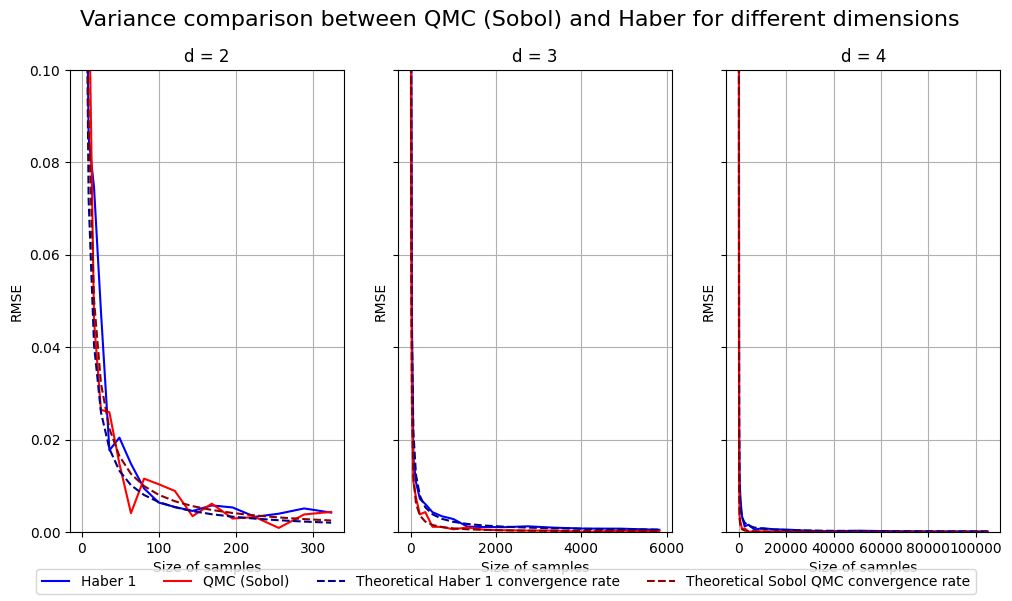

In [ ]:
plot_comparaison_MC_Haber_1_RMSE(18, [2,3,4],1000)
plt.ylim([0,0.1])

##2nd Haber estimator

In [ ]:
def Haber_estimator_symetric(k,d,l = 1):
  center = generate_center(k,d)
  uniform_vect = np.random.uniform(-1/(2*k),1/(2*k),(k**d,d))
  center_uniform_p = center + uniform_vect
  center_uniform_m = center - uniform_vect
  f_vectorized = np.vectorize(f, signature = '(n)->()')
  f_center_uniform_p = f_vectorized(center_uniform_p)
  f_center_uniform_m = f_vectorized(center_uniform_m)
  f_center_uniform = (f_center_uniform_p + f_center_uniform_m)/2
  
  return np.mean(f_center_uniform)

In [ ]:
def Comparaison_Haber(k, d, l=1, sim_per_sample_size=10):
    N = k**d
    nbr_points = k 

    y_Haber = np.zeros((nbr_points, sim_per_sample_size))
    y_Haber_symetric = np.zeros((nbr_points, sim_per_sample_size))
    sample_size_list = np.array( [ i**d for i in range(1,k+1)])

    for j in range(sim_per_sample_size): 
        y_Haber_j = []
        y_Haber_symetric_j = []
        
        for i in range(1,k+1):

            integral_Haber_j = Haber_estimator_1(i,d)
            integral_Haber_symetric_j = Haber_estimator_symetric(i,d)

            y_Haber_j.append(integral_Haber_j )
            y_Haber_symetric_j.append(integral_Haber_symetric_j)

        y_Haber[:, j] = y_Haber_j
        y_Haber_symetric[:,j] = y_Haber_symetric_j

    # Compute the mean and variance of the estimators over multiple runs
    bias_Haber = np.mean( y_Haber, axis = 1) - integral_value
    RMSE_Haber = np.sqrt( np.var(y_Haber, axis = 1) + bias_Haber**2)

    bias_Haber_symetric = np.mean( y_Haber_symetric, axis = 1) - integral_value
    RMSE_Haber_symetric = np.sqrt( np.var(y_Haber_symetric, axis = 1) + bias_Haber_symetric**2)

    # Theoretical convergence rates
    ref_convergence_Haber_symetric = 1/(sample_size_list)**(1/2 +2/d)
    rescale = (RMSE_Haber_symetric[0] + RMSE_Haber_symetric[1])/(ref_convergence_Haber_symetric[0] + ref_convergence_Haber_symetric[1])
    ref_convergence_Haber_symetric *= rescale

    ref_convergence_Haber = 1/(sample_size_list)**(1/2 + 1/d)
    rescale = (RMSE_Haber[0]+RMSE_Haber[1])/(ref_convergence_Haber[0] + ref_convergence_Haber[1])
    ref_convergence_Haber *= rescale

    return([sample_size_list, RMSE_Haber, RMSE_Haber_symetric, bias_Haber, bias_Haber_symetric, ref_convergence_Haber, ref_convergence_Haber_symetric])



In [ ]:
def plot_comparaison_Haber(k, d_values, l=1, nbr_points=200, sim_per_sample_size=10): #d_values list of dimensions we want to plot
    cols = 3 
    #rows = int(math.ceil(len(d_values)/3))
    rows = 1
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    #for i in list_rows :
    for j in list_cols :
        z = j
        if z < len(d_values) :
          res = Comparaison_Haber(k, d = d_values[z], sim_per_sample_size = 10)
          ax[j].plot(res[0], res[1], label='Haber 1', color = 'blue')
          ax[j].plot(res[0], res[2], label='Haber symetric', color = 'red')
          ax[j].set_title(f'd = {d_values[z]}')
          ax[j].grid()
          ax[j].set_xlabel('Value of k')
          ax[j].set_ylabel('RMSE')
          ax[j].plot(res[0], res[5], label = 'Theoretical Haber  convergence rate', color ='darkblue', linestyle='--')
          ax[j].plot(res[0], res[6], label = 'Theoretical Haber symetric convergence rate', color = 'darkred', linestyle='--')
    lines_labels = [ax[0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Comparison between both Haber estimator', fontsize=16)

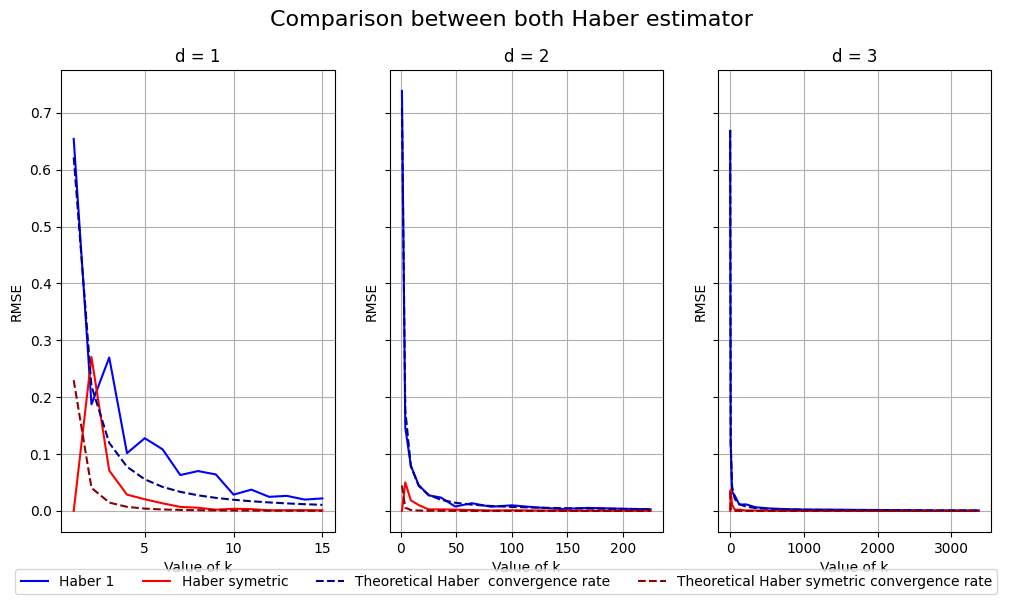

In [ ]:
plot_comparaison_Haber(15, [1,2,3], 100)

# **Bonus**

$\require{amsfonts}$
We have chosen a sampling  distribution "closed" to $f$ and from which we are able to simulate. Furthermore, the function from which we have deduced our sampling distribution's density is  linear by part so easy to integrate (by hand) in order to normalize to get the density. We found that the integral is equal to $1$ so there is no need to normalize at the end.

The density of our sampling distribution is:
 $ u → \mathbb{1} _{[0; \frac{1}{4}]}\textbf{[}-4\times\frac{1}{d}\sum_{i=1}^{d}u_{i} + 1] + \mathbb{1}_{[\frac{1}{4}; \frac{3}{4}]}[4\times\frac{1}{d}\sum_{i=1}^{d}u_{i} - 1] + \mathbb{1}_{[\frac{3}{4}; 1]}[-4\times\frac{1}{d}\sum_{i=1}^{d}u_{i} + 5]$

The ratio of $f$ over this density is bounded by $2$. This ensures that the variance is well defined and we will see that moreover it improves the variance compared to direct MC.

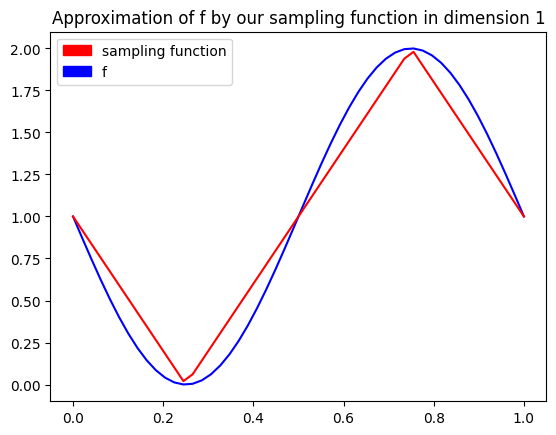

In [ ]:
# Define sampling distribution
def sampling_func(x):
  if np.mean(x) < 0.25:
    return -4 * np.mean(x) + 1
  elif np.mean(x) < 0.75:
    return 4 * np.mean(x) - 1
  return -4 * np.mean(x) + 5

# Set up data for 1 dimension (d=1)
x_values = np.linspace(0, 1, 50)  # Generate 50 evenly spaced points between 0 and 1
f_values = [f(x) for x in x_values]  # Evaluate the function f at each point in x_values

# Evaluate the sampling function at each point in x_values
sampling_values = [sampling_func(x) for x in x_values]

# Plot the original function and the sampling function
import matplotlib.patches as mpatches
plt.plot(x_values, f_values, '-b', x_values, sampling_values, '-r')
plt.title('Approximation of f by our sampling function in dimension 1')
red_patch = mpatches.Patch(color='red', label='sampling function')
blue_patch = mpatches.Patch(color='blue', label='f')
plt.legend(handles=[red_patch, blue_patch])
plt.show()


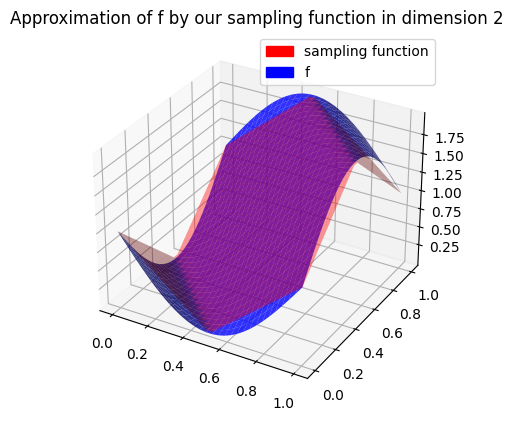

In [ ]:
#visualisation d=2:

def sampling_2d(x,y):
  u = np.array([x,y])
  if np.mean(u)<0.25:
    return -4*np.mean(u)+1
  elif np.mean(u)<0.75:
    return 4*np.mean(u)-1
  return -4*np.mean(u)+5

vprop = np.vectorize(sampling_2d)
x = np.linspace(0, 1, 30)
y = np.linspace(0, 1, 30)
X, Y = np.meshgrid(x, y)
Z = f_2(X, Y)
Z_prop = vprop(X,Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, color='blue',alpha=0.8);
ax.plot_surface(X, Y, Z_prop, rstride=1, cstride=1, color='red',alpha=0.4);
plt.title('Approximation of f by our sampling function in dimension 2')
red_patch = mpatches.Patch(color='red', label='sampling function')
blue_patch = mpatches.Patch(color='blue', label='f')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

If $d=1$, we could use the inverse CDF algorithm to simulate from our sampling distribution. Compared to rejection algorithms, CDF algorithm would have the advantage of generating only $N$ uniforms to simulate $N$ variables from our  sampling distribution.

However, we also want to generate from our sampling distribution with $d\geq 1$, the CDF algorithm is only availbale in dimension $1$, so we have decided to use rejection algortihm.

Whatever the dimension $d$, the acceptance rate is $\frac{1}{2}$. It is not a remarkable result in dimension $1$, but for $d$ large this rate is satifying. Indeed, often the acceptance rate depends on $d$ and goes to zero when $d$ tends to infinity (we find out the *Curse of dimensionality*)

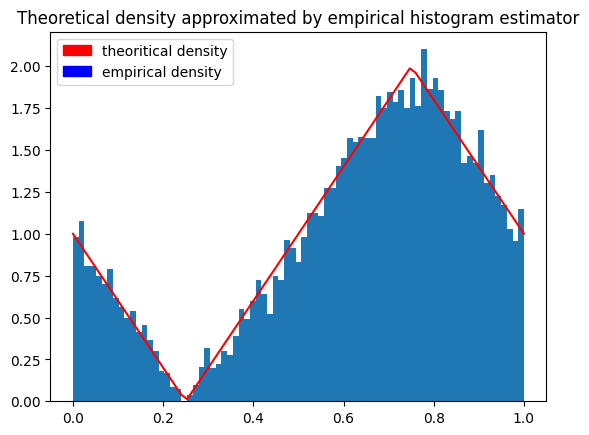

In [ ]:
# Define a function to simulate samples from our sampling distribution
# The acceptance/rejection of the samples is based on uniform distribution over [0;1]**d
def simu_sampling(N, d):
    # Set an upper bound for the ratio of densities, which determines the acceptance rate
    M = 2
    
    # Initialize an empty list to store the accepted samples
    res = []
    
    # Generate N samples
    for i in range(N):
        enter_boucle = True
        
        # Rejection algorithm: repeat until a sample is accepted
        while enter_boucle == True:
            # Generate a uniform random variable between 0 and 1
            U = np.random.rand()
            
            # Generate a d-dimensional sample from the proposal distribution
            Y = np.random.rand(d)
            
            # Compute the ratio of the densities of the proposal distribution and the target distribution
            ratio = sampling_func(Y) / M
            
            # Accept the sample with probability min(1, ratio)
            if U <= ratio:
                enter_boucle = False
                res.append(Y)
    
    # Return the list of accepted samples
    return res


# Illustration for d=1:
# Create an array of 80 evenly spaced values between 0 and 1
x = np.linspace(0, 1, 80)

# Compute the values of the sampling density for each value in x
y_samp = [sampling_func(x) for x in x]

# Generate 10^4 samples from the sampling distribution for d=1
simu = simu_sampling(10**4, 1)

# Extract the first coordinate of each sample to create a 1-dimensional array
simu = [s[0] for s in simu]

# Create a histogram of the simulated samples using the values in x as bins
plt.hist(simu, bins=x, density=True)

# Plot the values of the sampling density on top of the histogram in red
plt.plot(x, y_samp, '-r')

# Set the title of the plot
plt.title('Theoretical density approximated by empirical histogram estimator')

# Set the legend of the plot
red_patch = mpatches.Patch(color='red', label='theoritical density')
blue_patch = mpatches.Patch(color='blue', label='empirical density')
plt.legend(handles=[red_patch, blue_patch])

# Display the plot
plt.show()


In [ ]:
def IS_estimator(d,n):
  points_IS = simu_sampling(n,d)

  ratio_IS = [f(e)/sampling_func(e) for e in points_IS] #important sampling formula
  integral_IS = np.mean(ratio_IS)

  return integral_IS

In [ ]:
def Comparaison_MC_IS(d, N, nbr_points=200):

  # Initialize lists to store the results for each iteration
  y_MC = []
  y_IS = []
  
  # Define the range of iterations to use
  sample_size_list= np.linspace(10, N, nbr_points, dtype = int)
  
  # Loop over the number of iterations
  for n in sample_size_list:

    integral_MC_n = MC_estimator(d,n)
    integral_IS_n = IS_estimator(d,n)
    
    # Append the results to the lists
    y_MC.append(integral_MC_n)
    y_IS.append(integral_IS_n)
  
  return([sample_size_list, y_MC, y_IS])


In [ ]:
def plot_comparaison_MC_IS(d_values, N, nbr_points=200):
  cols = 3 
  rows = int(math.ceil(len(d_values)/3))
  fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
  
  list_rows = [i for i in range (0,rows)]
  list_cols = [i for i in range (0,cols)]
    
  for i in list_rows :
    for j in list_cols :
      k = i*cols + j
      if k <= len(d_values) :
        res = Comparaison_MC_IS(d_values[k], N, nbr_points=200)
        ax[i,j].plot(res[0], res[1], label='MC with pseudo random number generator')
        ax[i,j].plot(res[0], res[2], label='IS', color = 'red')
        ax[i,j].set_title(f'd = {d_values[k]}')
        ax[i,j].set_ylim([0.5, 1.5])
        ax[i,j].grid()
        ax[i,j].set_xlabel('Number of evaluations')
        ax[i,j].set_ylabel('Integral value')
        #ax[i,j].legend()

  lines_labels = [ax[0,0].get_legend_handles_labels()]
  lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

  fig.legend(lines, labels, loc='lower center', ncol=4)
  fig.suptitle('Comparison between classical MC and IS for different dimensions', fontsize=16)

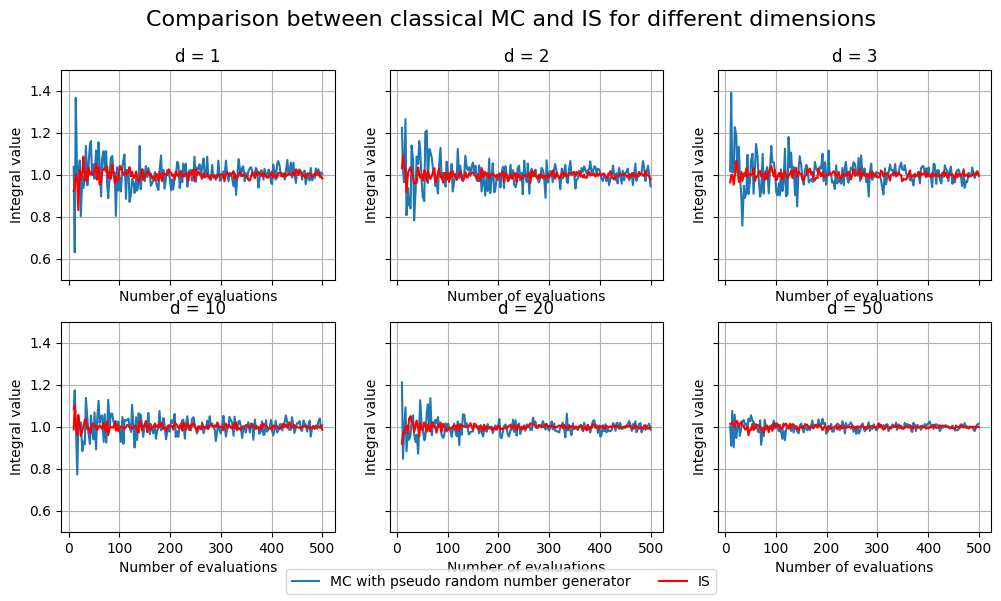

In [ ]:
plot_comparaison_MC_IS([1,2,3,10,20,50], 500)

In [ ]:
def Comparaison_RMSE_MC_IS(d, N, nbr_points=200, sim_per_sample_size =10, ax=None):
    y_MC = np.zeros((nbr_points, sim_per_sample_size))
    y_IS = np.zeros((nbr_points, sim_per_sample_size))
    
    for j in range(sim_per_sample_size): 
        y_MC_j = []
        y_IS_j = []
        sample_size_list = np.linspace(10, N, nbr_points, dtype = int)
        for n in sample_size_list :

          # Compute the MC and QMC estimates of the integral
          integral_MC_n = MC_estimator(d,n)
          integral_IS_n = IS_estimator(d,n)

          y_MC_j.append(integral_MC_n)
          y_IS_j.append(integral_IS_n)
        
        y_MC[:, j] = y_MC_j
        y_IS[:, j] = y_IS_j

 
    # Compute the mean and variance of the estimators over multiple runs
    bias_MC = np.mean( y_MC, axis = 1) - integral_value
    RMSE_MC = np.sqrt( np.var(y_MC, axis = 1) + bias_MC**2)
    bias_IS = np.mean( y_IS, axis = 1) - integral_value
    RMSE_IS = np.sqrt( np.var(y_IS, axis = 1) + bias_IS**2)


    # Rescale of the theoretical convergence rate by a constant 
    ref_convergence = 1/np.sqrt(sample_size_list)
    rescale = (RMSE_MC[0]+RMSE_MC[1])/(ref_convergence[0]+ref_convergence[1])
    ref_convergence *= rescale

    ref_convergence_IS = 1/sample_size_list
    rescale = (RMSE_IS[0] + RMSE_IS[0])/(ref_convergence_IS[0]+ref_convergence_IS[1])
    ref_convergence_IS *= rescale

    #ref_convergence_IS = 1/sample_size_list
    #rescale = (std_IS[0] + std_IS[0])/(ref_convergence_IS[0]+ref_convergence_IS[1])
    #ref_convergence_IS *= rescale

    return([sample_size_list, RMSE_MC, RMSE_IS, ref_convergence, ref_convergence_IS])

In [ ]:
def plot_comparaison_RMSE_MC_IS(d_values, N, nbr_points=200, sim_per_sample_size=10, ax=None):
    cols = 3 
    rows = int(math.ceil(len(d_values)/3))
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]

    #for i in list_rows :
    for j in list_cols :
        z = j
        if z < len(d_values) :
          res = Comparaison_RMSE_MC_IS( d_values[z], N , sim_per_sample_size = 10)
          ax[j].plot(res[0], res[1], label='MC estimator', color = 'blue')
          ax[j].plot(res[0], res[2], label='IS estimator', color = 'red')
          ax[j].set_title(f'd = {d_values[z]}')
          ax[j].grid()
          ax[j].set_xlabel('Size of samples')
          ax[j].set_ylabel('RMSE')
          ax[j].plot(res[0], res[3], label = 'Theoretical MC convergence rate', color ='darkblue', linestyle='--')
          #ax[j].plot(res[0], res[4], label = 'Theoretical Sobol QMC convergence rate', color = 'darkred', linestyle='--')
    lines_labels = [ax[0].get_legend_handles_labels()]
    
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Variance comparison between MC and IS for different dimensions', fontsize=16)


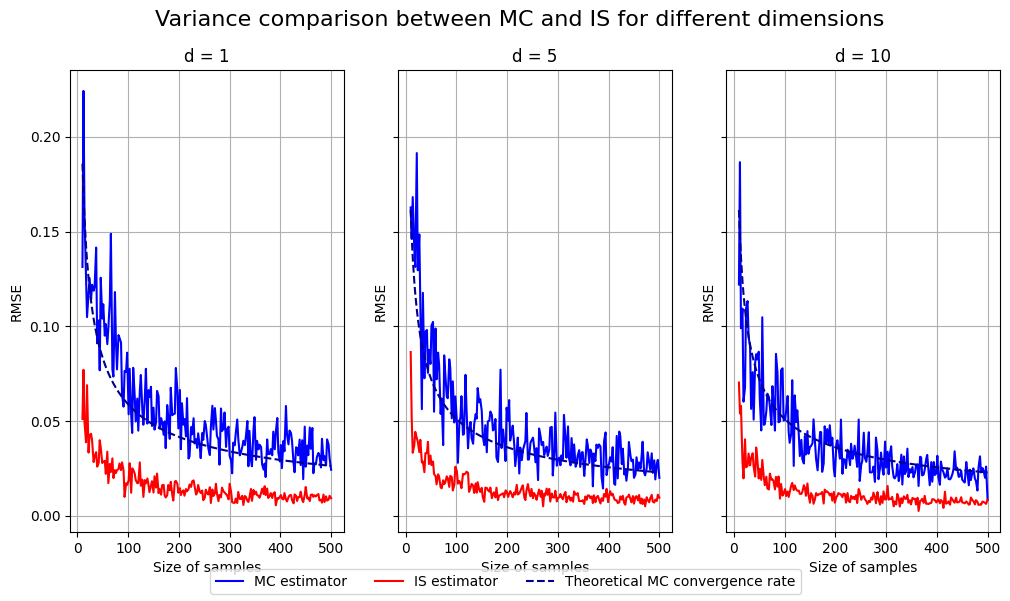

In [ ]:
plot_comparaison_RMSE_MC_IS([1,5,10], 500, nbr_points=200, sim_per_sample_size =10, ax=None)

In [ ]:
def Comparaison_IS_Haber_1(k, d, sim_per_sample_size=10):
    # Define the number of points in the sample
    N = k**d
    nbr_points = k 

    # Initialize arrays to store the estimator values for each sample size and simulation
    y_Haber = np.zeros((nbr_points, sim_per_sample_size))
    y_IS = np.zeros((nbr_points, sim_per_sample_size))

    # Generate a list of sample sizes
    sample_size_list = np.array([ i**d for i in range(1,k+1)])

    # Perform multiple simulations
    for j in range(sim_per_sample_size): 
        # Initialize arrays to store the estimator values for each sample size in the current simulation
        y_Haber_j = []
        y_IS_j = []

        # Compute the estimator for each sample size
        for i,n in enumerate(sample_size_list):
            # Compute the QMC estimator using the Sobol sequence
            integral_IS_n_j = IS_estimator(d,n)
            y_IS_j.append(integral_IS_n_j)

            # Compute the Haber estimator using Latin hypercube sampling
            y_Haber_j.append(Haber_estimator_1(k = i+1, d = d))

        # Store the estimator values for the current simulation
        y_IS[:, j] = y_IS_j
        y_Haber[:,j] = y_Haber_j

    # Compute the bias and RMSE for each estimator over multiple runs
    bias_Haber = np.mean( y_Haber, axis = 1) - integral_value
    RMSE_Haber = np.sqrt( np.var(y_Haber, axis = 1) + bias_Haber**2)

    bias_IS = np.mean( y_IS, axis = 1) - integral_value
    RMSE_IS = np.sqrt( np.var(y_IS, axis = 1) + bias_IS**2)


    ref_convergence_Haber = 1/(sample_size_list)**(1/2 +1/d)
    rescale = (RMSE_Haber[0] + RMSE_Haber[1])/(ref_convergence_Haber[0] + ref_convergence_Haber[1])
    ref_convergence_Haber *= rescale

    return([sample_size_list, RMSE_Haber, RMSE_IS, bias_Haber, bias_IS, ref_convergence_Haber])

In [ ]:
def plot_comparaison_IS_Haber_1_RMSE(k, d_values, nbr_points=400, sim_per_sample_size=10):
    cols = 3 
    #rows = int(math.ceil(len(d_values)/3))
    rows = 1
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    
    #for i in list_rows :
    for j in list_cols :
        z = j
        if z < len(d_values) :
          res = Comparaison_IS_Haber_1(k, d = d_values[z], sim_per_sample_size = 10)
          ax[j].plot(res[0], res[1], label='Haber 1', color = 'blue')
          ax[j].plot(res[0], res[2], label='IS', color = 'red')
          ax[j].set_title(f'd = {d_values[z]}')
          ax[j].grid()
          ax[j].set_xlabel('Size of samples')
          ax[j].set_ylabel('RMSE')
          ax[j].plot(res[0], res[5], label = 'Theoretical Haber 1 convergence rate', color ='darkblue', linestyle='--')
    lines_labels = [ax[0].get_legend_handles_labels()]
    
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Variance comparison between IS and Haber for different dimensions', fontsize=16)

(0.0, 0.1)

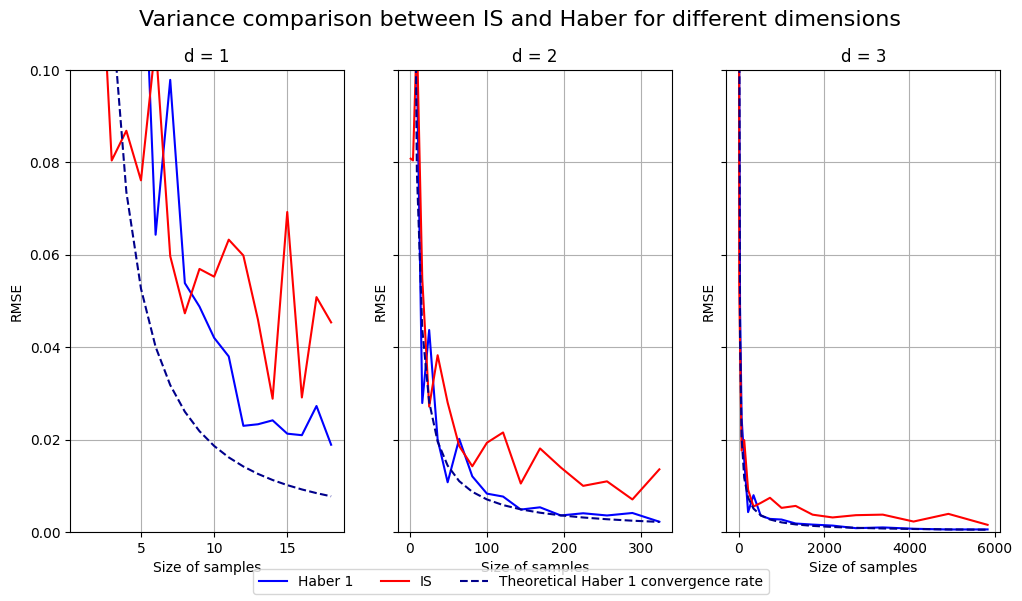

In [ ]:
plot_comparaison_IS_Haber_1_RMSE(18, [1,2,3])
plt.ylim([0,0.1])

In [ ]:
def Comparaison_IS_Haber_sym(k, d, sim_per_sample_size=10):
    # Define the number of points in the sample
    N = k**d
    nbr_points = k 

    # Initialize arrays to store the estimator values for each sample size and simulation
    y_Haber_sym = np.zeros((nbr_points, sim_per_sample_size))
    y_IS = np.zeros((nbr_points, sim_per_sample_size))

    # Generate a list of sample sizes
    sample_size_list = np.array([ i**d for i in range(1,k+1)])

    # Perform multiple simulations
    for j in range(sim_per_sample_size): 
        # Initialize arrays to store the estimator values for each sample size in the current simulation
        y_Haber_sym_j = []
        y_IS_j = []

        # Compute the estimator for each sample size
        for i,n in enumerate(sample_size_list):
            # Compute the QMC estimator using the Sobol sequence
            integral_IS_n_j = IS_estimator(d,n)
            y_IS_j.append(integral_IS_n_j)

            # Compute the Haber estimator using Latin hypercube sampling
            y_Haber_sym_j.append(Haber_estimator_symetric(k = i+1, d = d))

        # Store the estimator values for the current simulation
        y_IS[:, j] = y_IS_j
        y_Haber_sym[:,j] = y_Haber_sym_j

    # Compute the bias and RMSE for each estimator over multiple runs
    bias_Haber_sym = np.mean( y_Haber_sym, axis = 1) - integral_value
    RMSE_Haber_sym = np.sqrt( np.var(y_Haber_sym, axis = 1) + bias_Haber_sym**2)

    bias_IS = np.mean( y_IS, axis = 1) - integral_value
    RMSE_IS = np.sqrt( np.var(y_IS, axis = 1) + bias_IS**2)


    ref_convergence_Haber_symetric = 1/(sample_size_list)**(1/2 +2/d)
    rescale = (RMSE_Haber_sym[0] + RMSE_Haber_sym[1])/(ref_convergence_Haber_symetric[0] + ref_convergence_Haber_symetric[1])
    ref_convergence_Haber_symetric *= rescale

    return([sample_size_list, RMSE_Haber_sym, RMSE_IS, bias_Haber_sym, bias_IS, ref_convergence_Haber_symetric])

In [ ]:
def plot_comparaison_IS_Haber_sym_RMSE(k, d_values, nbr_points=400, sim_per_sample_size=10):
    cols = 3 
    #rows = int(math.ceil(len(d_values)/3))
    rows = 1
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    
    #for i in list_rows :
    for j in list_cols :
        z = j
        if z < len(d_values) :
          res = Comparaison_IS_Haber_sym(k, d = d_values[z], sim_per_sample_size = 10)
          ax[j].plot(res[0], res[1], label='Haber symetric', color = 'blue')
          ax[j].plot(res[0], res[2], label='IS', color = 'red')
          ax[j].set_title(f'd = {d_values[z]}')
          ax[j].grid()
          ax[j].set_xlabel('Size of samples')
          ax[j].set_ylabel('RMSE')
          ax[j].plot(res[0], res[5], label = 'Theoretical Haber symetric convergence rate', color ='darkblue', linestyle='--')
    lines_labels = [ax[0].get_legend_handles_labels()]
    
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Variance comparison between IS and Haber symetric for different dimensions', fontsize=16)

(0.0, 0.1)

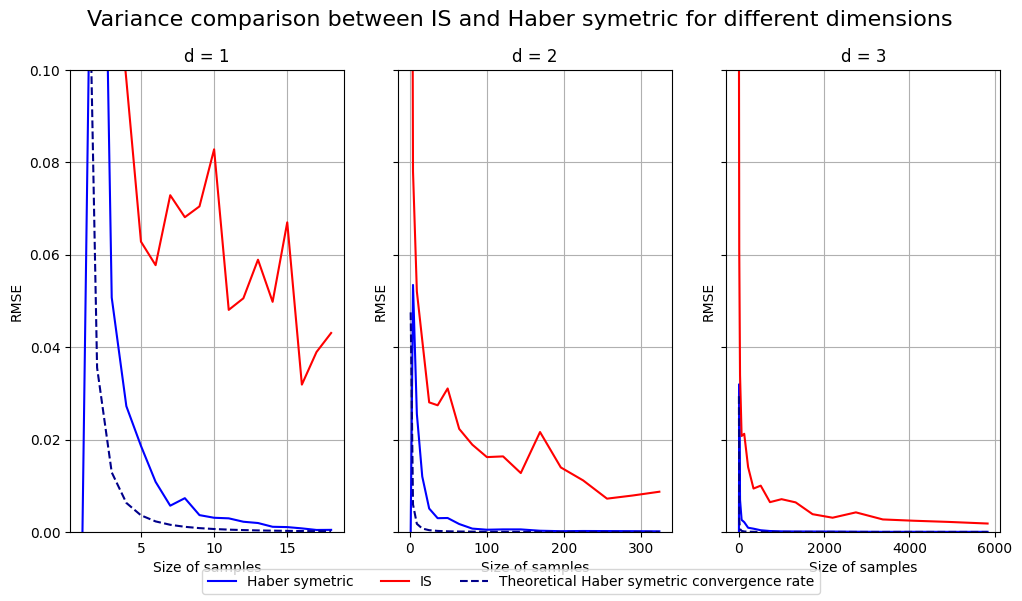

In [ ]:
plot_comparaison_IS_Haber_sym_RMSE(18, [1,2,3])
plt.ylim([0,0.1])

# Annexe - QMC with Halton sequence

Halton sequence, as Sobol sequence, is low-discrepancy sequence. The theoritical rate of convergence of its RMSE is bounded by $c\frac{\log(N)^{d}}{N}$ with $c$ a constant. Thus, Halton sequence has a better rate than direct Monte Carlo but in high dimension $d$ it could be equivalent (we are not sure since it's only an upper bound and we have seen that research is still in progress to find the rate of convergence).

We have taken the same code than for Sobol QMC, replacing Sobol's generator by Halton's generator:

In [ ]:
def QMC_Halton_estimator(d, n):
    sampler = qmc.Halton(d) #Halton generator
    points_QMC = sampler.random(n)
    f_vectorized = np.vectorize(f, signature='(n)->()')
    f_QMC = f_vectorized(points_QMC)
    
    integral_QMC = np.mean(f_QMC)
    return integral_QMC

def Comparaison_MC_QMC_Halton(d, N, nbr_points=200):
  y_MC = [] 
  y_QMC = [] 
  sample_size_list = np.linspace(10, N, nbr_points, dtype=int)
  for n in sample_size_list:
    integral_MC_n = MC_estimator(d, n)
    integral_QMC_n = QMC_Halton_estimator(d, n)
    y_MC.append(integral_MC_n)
    y_QMC.append(integral_QMC_n) 
  return [sample_size_list, y_MC, y_QMC]

def plot_comparaison_MC_QMC_Halton(d_values, N, nbr_points=200):
    cols = 3 
    rows = int(math.ceil(len(d_values)/3))
    fig, ax = plt.subplots(rows, cols,
                           sharex='col', 
                           sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    for i in list_rows:
        for j in list_cols:
            k = i * cols + j
            if k < len(d_values):
                res = Comparaison_MC_QMC_Halton(d_values[k], N, nbr_points=200)
                ax[i,j].plot(res[0], res[1], label='MC with pseudo random number generator')
                ax[i,j].plot(res[0], res[2], label='QMC (Halton)', color='red')
                ax[i,j].set_title(f'd = {d_values[k]}')
                ax[i,j].set_ylim([0.5, 1.5])
                ax[i,j].grid()
                ax[i,j].set_xlabel('Number of evaluations')
                ax[i,j].set_ylabel('Integral value')
    lines_labels = [ax[0,0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Comparison between classical MC and QMC(Halton) for different dimensions', fontsize=16)

def Comparaison_RMSE_MC_QMC_Halton_mean(d, N, nbr_points=200, sim_per_sample_size=10, ax=None):
    y_MC = np.zeros((nbr_points, sim_per_sample_size)) 
    y_QMC = np.zeros((nbr_points, sim_per_sample_size))
    for j in range(sim_per_sample_size): 
        y_MC_j = []  
        y_QMC_j = []  
        sample_size_list = np.linspace(10,N,nbr_points, dtype = int)
        for n in sample_size_list:
            integral_MC_n_j = MC_estimator(d,n)
            integral_QMC_n_j = QMC_Halton_estimator(d,n)
            y_MC_j.append(integral_MC_n_j)
            y_QMC_j.append(integral_QMC_n_j)
        y_MC[:, j] = y_MC_j
        y_QMC[:, j] = y_QMC_j
    bias_MC = np.mean( y_MC, axis = 1) - integral_value 
    RMSE_MC = np.sqrt( np.var(y_MC, axis = 1) + bias_MC**2) 
    bias_QMC = np.mean( y_QMC, axis = 1) - integral_value 
    RMSE_QMC = np.sqrt( np.var(y_QMC, axis = 1) + bias_QMC**2)
    ref_convergence = 1/np.sqrt(sample_size_list)
    rescale = (RMSE_MC[0]+RMSE_MC[1])/(ref_convergence[0]+ref_convergence[1])
    ref_convergence *= rescale

    return([sample_size_list, RMSE_MC, RMSE_QMC, ref_convergence])

def plot_comparaison_RMSE_MC_QMC_Halton_mean(d_values, N, nbr_points=200, sim_per_sample_size=10, ax=None):
    cols = 3 
    rows = int(math.ceil(len(d_values)/3))
    fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row', figsize=(12, 6))
    list_rows = [i for i in range (0,rows)]
    list_cols = [i for i in range (0,cols)]
    for i in list_rows :
      for j in list_cols :
        k = i*cols + j
        if k <= len(d_values) :
          res = Comparaison_RMSE_MC_QMC_Halton_mean(d = d_values[k], N = 500, sim_per_sample_size = 10)
          ax[i,j].plot(res[0], res[1], label='MC with pseudo random number generator')
          ax[i,j].plot(res[0], res[2], label='QMC (Halton)', color = 'red')
          ax[i,j].plot(res[0], res[3], label = 'Theoretical MC convergence rate', color ='darkblue', linestyle='--')
          ax[i,j].set_title(f'd = {d_values[k]}')
          ax[i,j].set_ylim([0,0.25])
          ax[i,j].grid()
          ax[i,j].set_xlabel('Size of samples')
          ax[i,j].set_ylabel('RMSE')
    lines_labels = [ax[0,0].get_legend_handles_labels()]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels, loc='lower center', ncol=4)
    fig.suptitle('Comparison between classical MC and QMC (Halton) for different dimensions', fontsize=16)

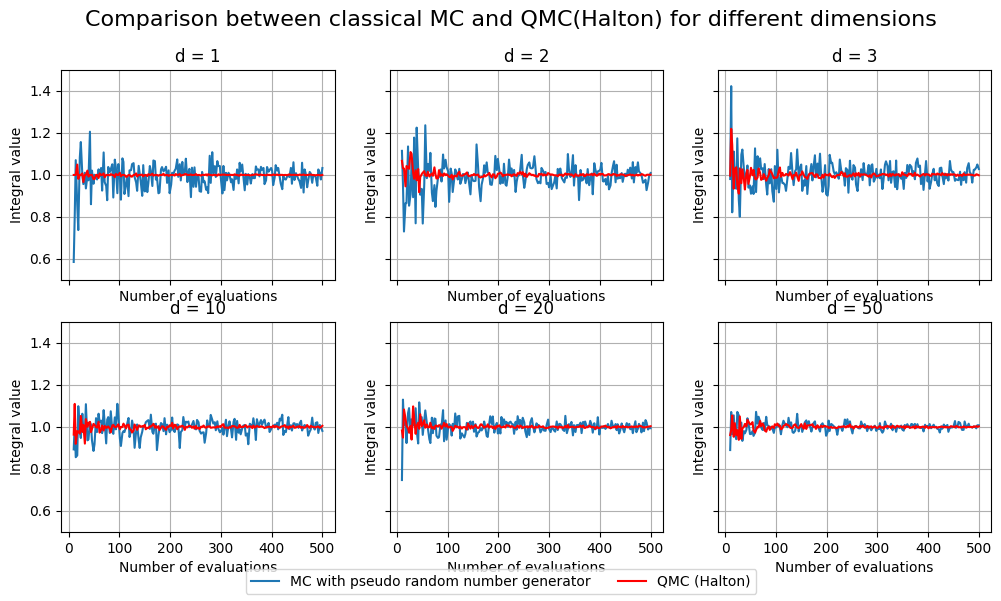

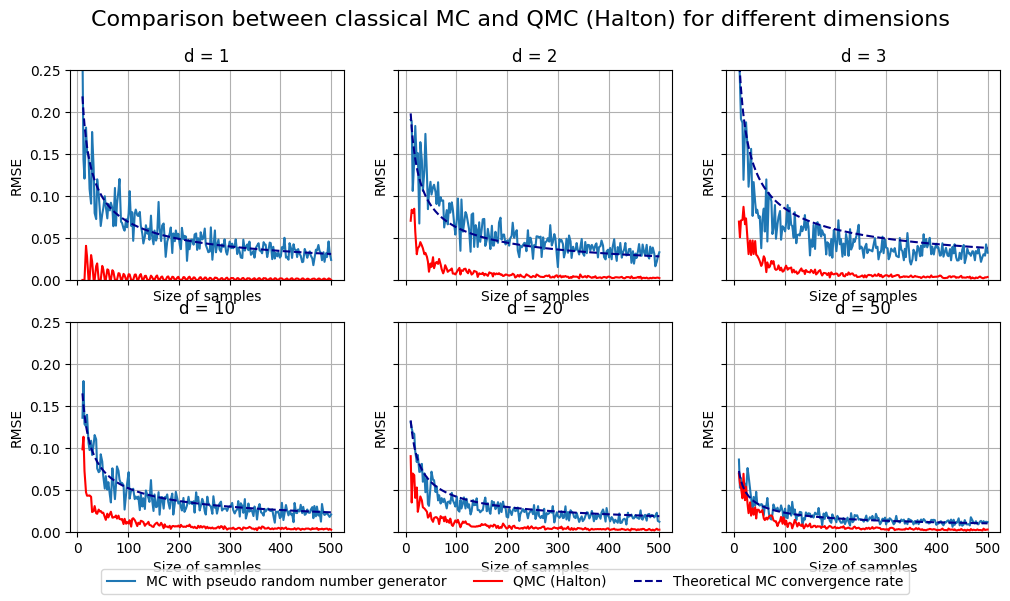

In [ ]:
plot_comparaison_MC_QMC_Halton([1,2,3,10,20,50], 500, nbr_points=200)
plt.show()
plot_comparaison_RMSE_MC_QMC_Halton_mean([1,2,3,10,20,50], 500, sim_per_sample_size = 50) 
plt.show()

We see that when $d$ increases, Halton's rate of convergence becomes closed to Monte Carlo one's, which confirms our assumption. So, QMC with Halton sequence is subject to the $\textit{curse of dimensionality}$.